In [1]:
!wget https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip

--2021-11-20 09:10:30--  https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fxn3ldztzwxm0rw/FruitsData.zip [following]
--2021-11-20 09:10:31--  https://www.dropbox.com/s/raw/fxn3ldztzwxm0rw/FruitsData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4d83e78d08dc4b46021e8d2ee6.dl.dropboxusercontent.com/cd/0/inline/BaVfx_ZoTb7enTvEg5RPq5Df21CaZvlX9vxY00prhKrbH39wlgmiodrU_cEY65W7xnJzrbg1pCNX59Wgw4GHSLFwn43ySoIYcSMdBIpDDQadY7WDh4S_t_OTD1HMymTWbmVAjNFEmj6yWeVrviUAPhSh/file# [following]
--2021-11-20 09:10:32--  https://uc4d83e78d08dc4b46021e8d2ee6.dl.dropboxusercontent.com/cd/0/inline/BaVfx_ZoTb7enTvEg5RPq5Df21CaZvlX9vxY00prhKrbH39wlgmiodrU_cEY65W7xnJzrbg1pCNX59Wgw4

In [2]:
!unzip -q "/content/FruitsData.zip"

In [3]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [4]:
# Creating the Pathlib PATH objects
train_path = Path("fruits-360/Training")
test_path = Path("fruits-360/Test")

In [5]:
# Getting Image paths 
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x) , train_image_paths))

train_image_paths[:10]

['fruits-360/Training/Pepino/235_100.jpg',
 'fruits-360/Training/Pepino/r_8_100.jpg',
 'fruits-360/Training/Pepino/r_277_100.jpg',
 'fruits-360/Training/Pepino/8_100.jpg',
 'fruits-360/Training/Pepino/r_42_100.jpg',
 'fruits-360/Training/Pepino/r_120_100.jpg',
 'fruits-360/Training/Pepino/r_156_100.jpg',
 'fruits-360/Training/Pepino/r_0_100.jpg',
 'fruits-360/Training/Pepino/r_132_100.jpg',
 'fruits-360/Training/Pepino/r_4_100.jpg']

In [6]:
# Getting their respective labels 

def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
train_image_labels[:10]

['Pepino',
 'Pepino',
 'Pepino',
 'Pepino',
 'Pepino',
 'Pepino',
 'Pepino',
 'Pepino',
 'Pepino',
 'Pepino']

In [7]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([92, 92, 92, 92, 92, 92, 92, 92, 92, 92])

In [8]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels)

In [73]:
len(Train_paths),len(Val_paths)

(50769, 16923)

In [10]:
Train_paths[:10] , Train_labels[:10]

(['fruits-360/Training/Chestnut/r2_63_100.jpg',
  'fruits-360/Training/Potato White/r2_186_100.jpg',
  'fruits-360/Training/Pear 2/r2_292_100.jpg',
  'fruits-360/Training/Cherry 1/r_125_100.jpg',
  'fruits-360/Training/Pitahaya Red/16_100.jpg',
  'fruits-360/Training/Apple Red 3/26_100.jpg',
  'fruits-360/Training/Nut Pecan/r_87_100.jpg',
  'fruits-360/Training/Pomegranate/r_59_100.jpg',
  'fruits-360/Training/Melon Piel de Sapo/r_247_100.jpg',
  'fruits-360/Training/Lemon Meyer/r_125_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [11]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [12]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 224 
BATCH_SIZE = 32

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [13]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
    
    dataset = dataset.repeat()
    return dataset

In [14]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 530 ms, sys: 44.1 ms, total: 574 ms
Wall time: 638 ms
(32, 224, 224, 3)
(32, 131)


Papaya


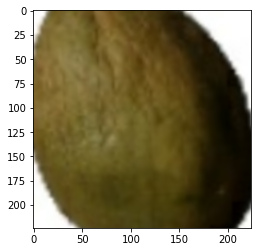

In [15]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [16]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 35.3 ms, sys: 7 ms, total: 42.3 ms
Wall time: 41.2 ms
(32, 224, 224, 3)
(32, 131)


Dates


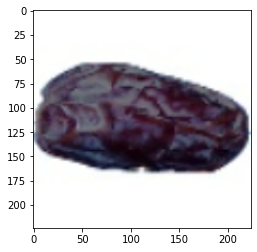

In [17]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [62]:
# Building CNN(Baseline) model
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(16,(2,2),input_shape=(224,224,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),    
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 56, 56, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 100352)          

In [63]:
#Compiling  model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [64]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [65]:
# Train the model
history = model.fit(
   train_dataset,
   steps_per_epoch=len(Train_paths)//BATCH_SIZE,
   epochs=4,
   callbacks=[checkpoint , early_stop],
   validation_data=val_dataset,
   validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/4
1585/1586 [============================>.] - ETA: 0s - loss: 11.3112 - accuracy: 0.0965 - precision: 0.5943 - recall: 0.0477
Epoch 00001: val_loss improved from inf to 5.22344, saving model to best_weights.h5
1586/1586 [==============================] - 235s 147ms/step - loss: 11.3062 - accuracy: 0.0966 - precision: 0.5942 - recall: 0.0477 - val_loss: 5.2234 - val_accuracy: 0.0769 - val_precision: 0.3296 - val_recall: 0.0366
Epoch 2/4
1586/1586 [==============================] - ETA: 0s - loss: 3.2984 - accuracy: 0.2125 - precision: 0.6914 - recall: 0.1105
Epoch 00002: val_loss did not improve from 5.22344
1586/1586 [==============================] - 233s 147ms/step - loss: 3.2984 - accuracy: 0.2125 - precision: 0.6914 - recall: 0.1105 - val_loss: 7.8468 - val_accuracy: 0.1030 - val_precision: 0.2590 - val_recall: 0.0657
Epoch 3/4
1586/1586 [==============================] - ETA: 0s - loss: 2.6521 - accuracy: 0.2984 - precision: 0.6832 - recall: 0.1717
Epoch 00003: val_loss d

In [67]:
model.save('saved_model/mymodel(Baseline_callbacks).h5') 

In [ ]:
# Load  model and evaluate on test dataset
#model = tf.keras.models.load_model('/content/saved_model/mymodel(Baseline_callbacks).h5')
# Check its architecture
#model.summary()

Testing Phase

In [68]:
model.load_weights("best_weights.h5")

In [69]:
# Create a Dataset Object for 'Testing' Set just the way we did for Training and Validation
test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x) , test_image_paths))
test_labels = list(map(lambda x : get_label(x) , test_image_paths))

test_labels = Le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

def decode_image(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    return image , label

test_dataset = (
     tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

In [74]:
len(test_image_paths)

22688

In [70]:
# Verify Test Dataset Object
image , label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Pepino


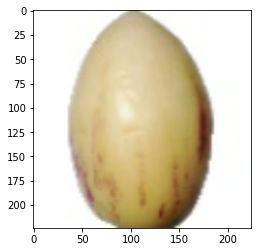

In [71]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [72]:
# Evaluating the loaded model
loss, acc, prec, rec = model.evaluate(test_dataset)

print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

709/709 [==============================] - 12s 18ms/step - loss: 5.3692 - accuracy: 0.0749 - precision: 0.3319 - recall: 0.0368
 Testing Acc :  0.07492947578430176
 Testing Precision  0.3318759799003601
 Testing Recall  0.03680359572172165


Real time case

In [75]:
def LoadImage(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image , 0)
    return image

def RealtimePrediction(image_path , model, encoder_):
    image = LoadImage(image_path)
    prediction = model.predict(image)
    prediction = np.argmax(prediction , axis = 1)
    return encoder_.inverse_transform(prediction)[0]

'Apple Red Yellow 2'

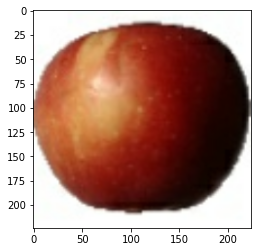

In [79]:
RealtimePrediction("/content/fruits-360/Test/Apple Braeburn/321_100.jpg" , model , Le)

'Melon Piel de Sapo'

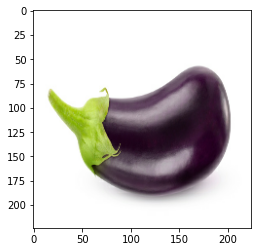

In [80]:
#RealtimePrediction("/content/fruits-360/Training/Apple Braeburn/100_100.jpg" , model , Le)
# Prediction on the image from internet
RealtimePrediction("/content/eggplant.jpg" , model , Le)

In [81]:
# Model using ResNet50 
from tensorflow.keras.applications import ResNet50V2

backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

94683136/94668760 [==============================] - 1s 0us/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_22 (Dense)            (None, 131)               268419    
                                                                 
Total params: 23,833,219
Trainable params: 23,787,779
Non-trainable params: 45,440
_________________________________________________________________


In [82]:
# Compiling model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [83]:
# Defining callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights_ResNet.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [84]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=4,
    callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/4
1586/1586 [==============================] - ETA: 0s - loss: 0.4792 - accuracy: 0.8635 - precision: 0.9263 - recall: 0.8270
Epoch 00001: val_loss improved from inf to 2.46341, saving model to best_weights_ResNet.h5
1586/1586 [==============================] - 315s 194ms/step - loss: 0.4792 - accuracy: 0.8635 - precision: 0.9263 - recall: 0.8270 - val_loss: 2.4634 - val_accuracy: 0.5634 - val_precision: 0.5982 - val_recall: 0.5337
Epoch 2/4
1586/1586 [==============================] - ETA: 0s - loss: 0.0832 - accuracy: 0.9740 - precision: 0.9772 - recall: 0.9711
Epoch 00002: val_loss did not improve from 2.46341
1586/1586 [==============================] - 312s 196ms/step - loss: 0.0832 - accuracy: 0.9740 - precision: 0.9772 - recall: 0.9711 - val_loss: 2.9605 - val_accuracy: 0.4719 - val_precision: 0.5041 - val_recall: 0.4518
Epoch 3/4
1586/1586 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9821 - precision: 0.9835 - recall: 0.9804
Epoch 00003: val_l

In [85]:
model.save('saved_model/mymodel(ResNet).h5') 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [86]:
# Load  model and evaluate on test dataset
#model = tf.keras.models.load_model('/content/saved_model/mymodel(ResNet).h5')
# Check its architecture
#model.summary()

Testing Phase

In [87]:
model.load_weights('best_weights_ResNet.h5')

In [88]:
# Evaluating the loaded model
loss, acc, prec, rec = model.evaluate(test_dataset)

print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

709/709 [==============================] - 39s 55ms/step - loss: 2.2552 - accuracy: 0.5947 - precision: 0.6234 - recall: 0.5784
 Testing Acc :  0.594675600528717
 Testing Precision  0.6234204173088074
 Testing Recall  0.5784115195274353


Real time case

'Apple Braeburn'

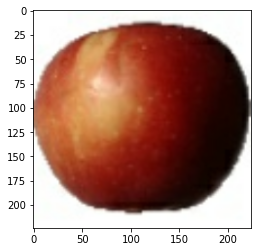

In [89]:
RealtimePrediction("/content/fruits-360/Test/Apple Braeburn/321_100.jpg" , model , Le)

'Corn Husk'

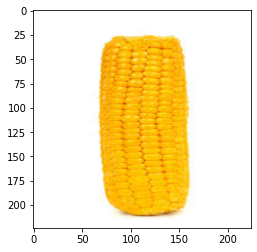

In [109]:
# Prediction on the image from internet
RealtimePrediction("/content/corn.jpg" , model , Le)

'Eggplant'

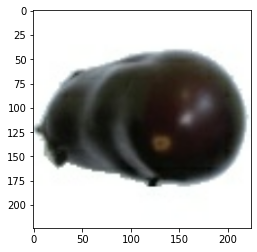

In [110]:
# Prediction on the image from internet
RealtimePrediction("/content/r_65_100.jpg" , model , Le)

In [91]:
# Building model using EfficientNetB3 
from tensorflow.keras.applications import EfficientNetB3

backbone = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d_7   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_14 (Dropout)        (None, 1536)              0         
                                                                 
 dense_23 (Dense)            (None, 128)               196736    
                                                                 
 dense_24 (Dense)            (None, 131)               16899     
                                                                 
Total params: 10,997,170
Trainable params: 10,909,867
Non-trainable params: 87,303
____________________________________

In [92]:
#Compiling model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [93]:
# Defining callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights_EfficientNet.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [94]:
# Train the model
history = model.fit(
   train_dataset,
   steps_per_epoch=len(Train_paths)//BATCH_SIZE,
   epochs=4,
   callbacks=[checkpoint , early_stop],
   validation_data=val_dataset,
   validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/4
1586/1586 [==============================] - ETA: 0s - loss: 0.3623 - accuracy: 0.9056 - precision: 0.9519 - recall: 0.8775
Epoch 00001: val_loss improved from inf to 0.60737, saving model to best_weights_EfficientNet.h5
1586/1586 [==============================] - 712s 438ms/step - loss: 0.3623 - accuracy: 0.9056 - precision: 0.9519 - recall: 0.8775 - val_loss: 0.6074 - val_accuracy: 0.8246 - val_precision: 0.8550 - val_recall: 0.8056
Epoch 2/4
1586/1586 [==============================] - ETA: 0s - loss: 0.0886 - accuracy: 0.9743 - precision: 0.9781 - recall: 0.9713
Epoch 00002: val_loss did not improve from 0.60737
1586/1586 [==============================] - 689s 434ms/step - loss: 0.0886 - accuracy: 0.9743 - precision: 0.9781 - recall: 0.9713 - val_loss: 1.1542 - val_accuracy: 0.7572 - val_precision: 0.7881 - val_recall: 0.7346
Epoch 3/4
1586/1586 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9798 - precision: 0.9819 - recall: 0.9777
Epoch 00003:

In [95]:
model.save('saved_model/mymodel(EfficientNet).h5') 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [96]:
# Load  model and evaluate on test dataset
#model = tf.keras.models.load_model('/content/saved_model/mymodel(EfficientNet).h5')
# Check its architecture
#model.summary()

Testing Phase

In [97]:
model.load_weights('best_weights_EfficientNet.h5')

In [98]:
# Evaluating the loaded model
loss, acc, prec, rec = model.evaluate(test_dataset)

print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

709/709 [==============================] - 52s 73ms/step - loss: 0.8078 - accuracy: 0.7791 - precision: 0.8168 - recall: 0.7548
 Testing Acc :  0.7791343331336975
 Testing Precision  0.8168376088142395
 Testing Recall  0.7548043131828308


Real Time Prediction

'Apple Braeburn'

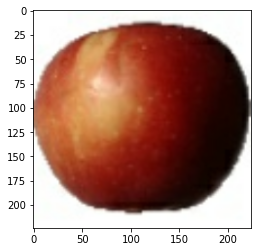

In [99]:
RealtimePrediction("/content/fruits-360/Test/Apple Braeburn/321_100.jpg" , model , Le)

'Corn Husk'

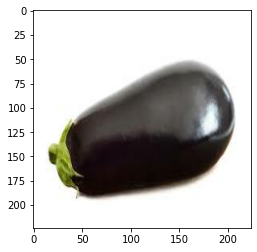

In [113]:
# Prediction on the image from internet
RealtimePrediction("/content/eggplant2.jpg" , model , Le)